# Classification model using Random Forest

### 1. Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

### 2. Upload RNA data

In [4]:
path ='C:/Users/sandr/Documents/ART_project/GNN model/Data/PPT-Ohmnet/mRCC_big_pool/Second big pool/mrcc_protein_matrix_203_genes_74_nodes.csv'
data = pd.read_csv(path)
data.head(5)

,Unnamed: 0,AKT1,ANXA1,ANXA2,APAF1,APC,ARID1A,ATM,AXIN2,BAP1,...,SOD2,SRC,STK11,TGM2,TP53,TSC1,TSC2,VEGFA,VHL,Y
0,0,34.434275,33.868001,37.396638,32.668769,32.860903,33.848026,35.942429,31.470999,33.677294,...,38.67433,32.25286,34.96649,38.50142,33.83518,32.93402,34.93520,37.79678,32.30615,1
1,1,34.152701,35.085434,36.570671,32.337493,33.717568,33.843513,35.988225,29.614297,32.643149,...,38.64559,31.28699,33.69034,34.33752,34.44810,33.16630,35.08304,40.09193,32.19988,1
2,2,35.449119,34.908372,38.443020,31.818198,34.023099,33.516005,36.193587,30.304642,32.368866,...,40.50559,32.18447,33.52524,35.50178,35.41980,33.63282,34.79244,38.22308,31.49147,1
3,3,34.220278,36.290124,37.244829,32.601293,33.507711,34.197698,36.578348,29.398240,31.895400,...,38.99231,30.26144,33.20234,35.77236,34.18862,32.88250,35.02014,39.94908,32.11538,0
4,4,33.973368,36.863272,36.871693,33.593121,34.607163,33.351460,36.807497,29.939456,33.968348,...,38.41437,33.05053,34.14981,33.47112,34.91241,33.44515,35.01310,39.31564,33.33646,1


In [5]:
X = data.iloc[:,1:75  ] 
Y = []
for i in range (len(data)):
    if data.Y[i]==0: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    else:
        Y.append(1)# If PFS is over 3 months, I will consider it as Responder (R)
print(X)
print('Numero de pacientes: ',len(Y))

          AKT1      ANXA1      ANXA2      APAF1        APC     ARID1A  \
0    34.434275  33.868001  37.396638  32.668769  32.860903  33.848026   
1    34.152701  35.085434  36.570671  32.337493  33.717568  33.843513   
2    35.449119  34.908372  38.443020  31.818198  34.023099  33.516005   
3    34.220278  36.290124  37.244829  32.601293  33.507711  34.197698   
4    33.973368  36.863272  36.871693  33.593121  34.607163  33.351460   
..         ...        ...        ...        ...        ...        ...   
176  35.057571  35.985233  37.436964  32.603769  33.811200  34.133940   
177  32.553513  37.586062  37.635004  33.619701  32.786808  32.373330   
178  34.807825  36.111194  37.953757  33.316811  33.632929  34.118843   
179  34.787403  35.120811  35.957212  33.046782  34.048901  33.833796   
180  34.983826  34.648929  38.196845  32.170042  33.143095  33.739764   

           ATM      AXIN2       BAP1     CARD11  ...    SLC2A1      SOD2  \
0    35.942429  31.470999  33.677294  30.617112

### 3. Train-Test dataset split

In [6]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125, stratify=Y)

# Convert sets to arrays
XTrain = XTrain.values
XTest = XTest.values

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


### 4. Select the parameters of the model and fit it

In [7]:
param_grid = {'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 3, 4, 5],
              'random_state':[125],
              'n_estimators': [10, 20],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy'],
              'max_depth':[None, 2, 5, 10,50]
              }

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(
        estimator  = RandomForestClassifier(),
        param_grid = param_grid,
        cv=5
       )

clf.fit(XTrain , yTrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 5, 10, 50],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 20], 'random_state': [125]})

In [8]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
# Fit the model with the best parameters
model.fit(XTrain , yTrain)

Best estimate of parameters according to GridSearchCV:


RandomForestClassifier(bootstrap=False, min_samples_split=3, n_estimators=10,
                       random_state=125)

In [9]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.5960591133004927


### 5. Prediction

In [10]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [11]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1


### 6. Results

In [12]:
print('Final accuracy on the training dataset:' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(yTest)))

Final accuracy on the training dataset:1.0
Final accuracy on the testing dataset: 0.4594594594594595


In [13]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[68  0]
 [ 0 76]]
Input data:  [1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1
 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1]
Prediction:        [1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1
 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1]


In [14]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        76

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144



In [15]:
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix(yTest,yhatTest))
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[ 7 10]
 [10 10]]
Input data:  [0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0]
Prediction:        [1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0]


In [16]:
print(classification_report(yTest,yhatTest))

              precision    recall  f1-score   support

           0       0.41      0.41      0.41        17
           1       0.50      0.50      0.50        20

    accuracy                           0.46        37
   macro avg       0.46      0.46      0.46        37
weighted avg       0.46      0.46      0.46        37



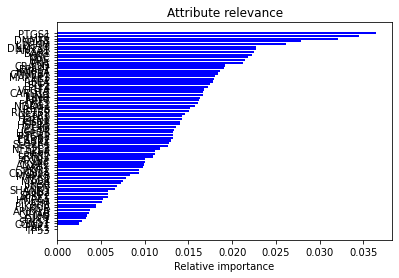

AKT1 = 0.009800292586670294
ANXA1 = 0.022661463276151032
ANXA2 = 0.009947688942931557
APAF1 = 0.005812812574422481
APC = 0.010012933825551197
ARID1A = 0.0037925696594427265
ATM = 0.005086342229199371
AXIN2 = 0.010027845724756072
BAP1 = 0.022533337610311188
CARD11 = 0.016690679050066437
CASP2 = 0.012979513494003897
CCND1 = 0.0024941003269176643
CDKN2A = 0.00929202417413182
CRADD = 0.019172531934336802
CRYAB = 0.003646867926911266
CTNNB1 = 0.018374126792984922
CTSD = 0.013554026130572966
DLC1 = 0.003345670251906431
DNMT1 = 0.0321174621168802
DNMT3A = 0.02270207101150633
EPAS1 = 0.019069370890272087
ERBB2 = 0.013189990384631912
ERN1 = 0.014257642625727495
FLT1 = 0.01751391774617158
FLT4 = 0.017199423811542346
FN1 = 0.021212942045179324
FOSL2 = 0.01609602340238519
GSTP1 = 0.014633070698040323
HNF1A = 0.01859582042063161
HNF4A = 0.005193905817174517
HSPA9 = 0.014265391056336053
HSPB1 = 0.01397689211840904
HSPD1 = 0.013264977638633383
IGF1R = 0.013293493749011866
IL6 = 0.034489003163863295
I

In [17]:
# Through the created model we can see which attributes are the most significant to make a decision.
# The most relevant attributes will be the ones placed at the top of the tree.
features = list(X)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Attribute relevance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

for name, importance in zip(X, model.feature_importances_):
    print(name, "=", importance)

# Attributes whose relevance is 0, will not be necessary to make the prediction of the target.